In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df_pre = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [ ]:
df_pre

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_na = df_pre.dropna()

In [ ]:
pd.isnull(df_na).any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [ ]:
df_na['marriage'] = df_na.ever_married.map({'Yes':1, 'No':0})

In [ ]:
df_na.head(30)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,marriage
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,0
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1,1


In [ ]:
def BMI_check(x):
    if x >= 30:
        return 1
    else:
        return 0
    
df_na['Obesity'] = df_na.bmi.apply(BMI_check)

In [ ]:
df_na.Obesity.value_counts()

0    2989
1    1920
Name: Obesity, dtype: int64

In [ ]:
df_clean = df_na.drop(columns = ['ever_married'])

In [ ]:
df_clean.head(10)

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,marriage,Obesity
0,9046,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1,1
2,31112,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1,1
3,60182,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,1,1
4,1665,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,1,0
5,56669,Male,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked,1,1,0
6,53882,Male,74.0,1,1,Private,Rural,70.09,27.4,never smoked,1,1,0
7,10434,Female,69.0,0,0,Private,Urban,94.39,22.8,never smoked,1,0,0
9,60491,Female,78.0,0,0,Private,Urban,58.57,24.2,Unknown,1,1,0
10,12109,Female,81.0,1,0,Private,Rural,80.43,29.7,never smoked,1,1,0
11,12095,Female,61.0,0,1,Govt_job,Rural,120.46,36.8,smokes,1,1,1


In [ ]:
df_clean.to_csv('clean_stroke_data.csv')

In [ ]:
np.unique(df_clean['work_type'])

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [ ]:
np.unique(df_na['Residence_type'])

array(['Rural', 'Urban'], dtype=object)

In [ ]:
df_dum = pd.get_dummies(df_clean, columns = ['gender','work_type','smoking_status', 'Residence_type'], \
                           prefix = {'gender': 'Gender','work_type':'Work', 'smoking_status' : 'smoking', 'Residence_type' : 'Residence'}, drop_first=False)

In [ ]:
df_dum.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Obesity,Gender_Female,...,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,9046,67.0,0,1,228.69,36.6,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1
2,31112,80.0,0,1,105.92,32.5,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,1,1,...,0,1,0,0,0,0,0,1,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,1,...,0,0,1,0,0,0,1,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
df_dum.to_csv('stroke_data_dummies.csv')

In [ ]:
df2 = df_dum.drop(['id'], axis = 1)
df2

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Obesity,Gender_Female,Gender_Male,...,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,228.69,36.6,1,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2,80.0,0,1,105.92,32.5,1,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,49.0,0,0,171.23,34.4,1,1,1,1,0,...,0,1,0,0,0,0,0,1,0,1
4,79.0,1,0,174.12,24.0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,1
5107,35.0,0,0,82.99,30.6,0,1,1,1,0,...,0,0,1,0,0,0,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
df2.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'marriage', 'Obesity', 'Gender_Female', 'Gender_Male',
       'Gender_Other', 'Work_Govt_job', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'smoking_Unknown',
       'smoking_formerly smoked', 'smoking_never smoked', 'smoking_smokes',
       'Residence_Rural', 'Residence_Urban'],
      dtype='object')

In [ ]:
X = df2.drop(['stroke'],axis = 1)
Y = df2['stroke']
X.shape, Y.shape

((4909, 21), (4909,))

In [ ]:
df2

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Obesity,Gender_Female,Gender_Male,...,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,228.69,36.6,1,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2,80.0,0,1,105.92,32.5,1,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,49.0,0,0,171.23,34.4,1,1,1,1,0,...,0,1,0,0,0,0,0,1,0,1
4,79.0,1,0,174.12,24.0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,1
5107,35.0,0,0,82.99,30.6,0,1,1,1,0,...,0,0,1,0,0,0,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
def treatment_group(df):
    n = df.shape[0]
    age = df['age'].values.reshape(-1,1)
    treatment = np.zeros(n)
    for i in range(n):
        if age[i] <= 44:
            treatment[i] = 0
        else:
            treatment[i] = 1
    df['treatment'] = treatment 
    return df 
df3 = treatment_group(df2)
df3
    

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Obesity,Gender_Female,Gender_Male,...,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban,treatment
0,67.0,0,1,228.69,36.6,1,1,1,0,1,...,1,0,0,0,1,0,0,0,1,1.0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,...,1,0,0,0,0,1,0,1,0,1.0
3,49.0,0,0,171.23,34.4,1,1,1,1,0,...,1,0,0,0,0,0,1,0,1,1.0
4,79.0,1,0,174.12,24.0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1.0
5,81.0,0,0,186.21,29.0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0.0
5106,81.0,0,0,125.20,40.0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,1,1.0
5107,35.0,0,0,82.99,30.6,0,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0.0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1.0


In [ ]:
data = df3[['age', 'stroke', 'treatment']]
data #1 = stroke, 0 = no stroke


,age,stroke,treatment
0,67.0,1,1.0
2,80.0,1,1.0
3,49.0,1,1.0
4,79.0,1,1.0
5,81.0,1,1.0
...,...,...,...
5104,13.0,0,0.0
5106,81.0,0,1.0
5107,35.0,0,0.0
5108,51.0,0,1.0


In [ ]:
stroke = data[data['stroke'] == 1]
no_stroke = data[data['stroke'] == 0]
stroke

,age,stroke,treatment
0,67.0,1,1.0
2,80.0,1,1.0
3,49.0,1,1.0
4,79.0,1,1.0
5,81.0,1,1.0
...,...,...,...
243,68.0,1,1.0
244,57.0,1,1.0
245,14.0,1,0.0
246,75.0,1,1.0


In [ ]:
#EDA 
stroke = data[data['stroke'] == 1]
no_stroke = data[data['stroke'] == 0]
stroke['label'] = 'True'
no_stroke['label'] = 'False'

final_df = pd.concat((stroke,no_stroke), axis = 0)
final_df

,age,stroke,treatment,label
0,67.0,1,1.0,True
2,80.0,1,1.0,True
3,49.0,1,1.0,True
4,79.0,1,1.0,True
5,81.0,1,1.0,True
...,...,...,...,...
5104,13.0,0,0.0,False
5106,81.0,0,1.0,False
5107,35.0,0,0.0,False
5108,51.0,0,1.0,False


In [ ]:
stroke.shape, no_stroke.shape 

((209, 3), (4700, 3))

In [ ]:
#209 people have gotten a stroke
#4700 have no stroke 

#the age distribution of people with stroke 
stroke.describe()

,age,stroke,treatment
count,209.000000,209.0,209.000000
mean,67.712919,1.0,0.961722
std,12.402848,0.0,0.192326
min,14.000000,1.0,0.000000
25%,58.000000,1.0,1.000000
50%,70.000000,1.0,1.000000
75%,78.000000,1.0,1.000000
max,82.000000,1.0,1.000000


In [ ]:
import plotly.express as px 
fig = px.box(data, x = 'stroke', y = 'age', template = 'plotly_dark', color = 'stroke', title = 'Boxplot for age vs stroke')
fig.show()

In [ ]:
#stroke: max = 82, median = 70, min = 32
#no stroke is uniform distribution 


fig = px.box(data, x='treatment', y='age', template='plotly_dark', color='stroke', title='Boxplot for treatment age vs stroke')
fig.show()


In [ ]:
#treatment 0: when age <= 44
#treatment 1: when age > 44

#treatment 0 (stroke): when age <= 44 max age for stroke is 43, median is 39, q3 = 40.5 , q1 = 35, min = 14 
#treatment 0 (no_stroke): max:44, q3:35, median:25, q1:13, min = 0.08(baby) ->normal distribution -> very very balanced 

#treatment 1 (stroke): max:82, q3: 79, median:71, q1:59, min 45
#treatment 1 (no_stroke): max:82, q3:70, median:60, q1:52, min:45 (basically normal distribution)




In [ ]:
df4 = treatment_group(df_dum)
df4

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Obesity,Gender_Female,...,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban,treatment
0,9046,67.0,0,1,228.69,36.6,1,1,1,0,...,1,0,0,0,1,0,0,0,1,1.0
2,31112,80.0,0,1,105.92,32.5,1,1,1,0,...,1,0,0,0,0,1,0,1,0,1.0
3,60182,49.0,0,0,171.23,34.4,1,1,1,1,...,1,0,0,0,0,0,1,0,1,1.0
4,1665,79.0,1,0,174.12,24.0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,1.0
5,56669,81.0,0,0,186.21,29.0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0.0
5106,44873,81.0,0,0,125.20,40.0,0,1,1,1,...,0,1,0,0,0,1,0,0,1,1.0
5107,19723,35.0,0,0,82.99,30.6,0,1,1,1,...,0,1,0,0,0,1,0,1,0,0.0
5108,37544,51.0,0,0,166.29,25.6,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1.0


In [ ]:
df4.isnull().sum()

id                         0
age                        0
hypertension               0
heart_disease              0
avg_glucose_level          0
bmi                        0
stroke                     0
marriage                   0
Obesity                    0
Gender_Female              0
Gender_Male                0
Gender_Other               0
Work_Govt_job              0
Work_Never_worked          0
Work_Private               0
Work_Self-employed         0
Work_children              0
smoking_Unknown            0
smoking_formerly smoked    0
smoking_never smoked       0
smoking_smokes             0
Residence_Rural            0
Residence_Urban            0
treatment                  0
dtype: int64

In [ ]:
df4.rename({'treatment': 'treatment_age'}, axis = 1, inplace = True)
df4.drop(['id'], axis = 1, inplace = True)

In [ ]:
Y = df4['stroke']
df_data = df4.loc[:,df4.columns !='stroke']
T = df_data.treatment_age
X = df_data.loc[:,df_data.columns !='treatment_age']



In [ ]:
control = df4[df4['treatment_age'] == 0]
treat = df4[df4['treatment_age'] == 1]

control

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,marriage,Obesity,Gender_Female,Gender_Male,...,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban,treatment_age
31,42.0,0,0,83.41,25.4,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0.0
49,39.0,1,0,58.09,39.2,1,1,1,1,0,...,1,0,0,0,0,0,1,1,0,0.0
79,43.0,0,0,143.43,45.9,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0.0
118,38.0,0,0,82.28,24.0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0.0
182,32.0,0,0,76.13,29.9,1,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,9.0,0,0,71.88,17.5,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0.0
5103,18.0,0,0,82.85,46.9,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0.0
5104,13.0,0,0,103.08,18.6,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0.0
5107,35.0,0,0,82.99,30.6,0,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0.0


[2.43190671e-01 3.07405678e-02 2.73740118e-02 2.37307412e-01
 2.18186012e-01 2.07993960e-02 3.21565883e-02 1.63835143e-02
 1.67911999e-02 1.41660887e-06 1.36279252e-02 4.77110609e-05
 1.70455103e-02 1.54343025e-02 1.44755793e-03 1.13623860e-02
 1.81226928e-02 1.92610595e-02 1.70831873e-02 2.19283185e-02
 2.17085593e-02]


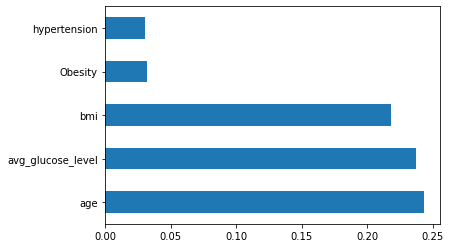

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt 
%matplotlib inline 

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

In [ ]:
X = df4[['Obesity', 'bmi', 'avg_glucose_level', 'age', 'hypertension']]
Y = df4[['stroke']]
T = df4[['treatment_age']] 



In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
Xnorm = sc.fit_transform(X)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state= 1)
rc = RandomForestClassifier(criterion = 'entropy', n_estimators = 500, min_samples_split = 5)
rc.fit(xtrain,ytrain)
pred = rc.predict(xtest)
pred_prob = rc.predict_proba(xtest)
acc = rc.score(xtest,ytest)

acc


0.9480651731160896

In [ ]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

matrix = confusion_matrix(pred, ytest)
matrix

array([[931,  51],
       [  0,   0]])